 데이터 전처리(Data Preprocessing)는 ML 알고리즘만큼 중요하다 사이킷런의 ML알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항이 있다. 

 결손값, 즉 NaN, Null값은 허용되지 않는다. 따라서 이러한 Null값은 고정된 다른 값으로 변환해야 한다. Null값을 어떻게 처리해야 할지는 경우에 따라 다르다. 1)피처 값 중 Null값이 얼마되지 않는다면 피처의 평균값 등으로 간단히 대체할 수 있다. 하지만 Null값이 대부분이라면 오히려 2)해당 피처는 드롭하는 것이 좋다. 가장 결정이 힘든 부분이 Null값이 일정수준 이상 되는 경우이다. 정확히 몇 퍼센트까지를 일정 수준 이상이라고 한다는 기준은 없다. 하지만 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 업무로직 등을 상세히 검토해 더 정밀한 대체 값을 선정해야 한다. 

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다. 그래서 모든 문자열 값은 인코딩돼서 숫자형으로 변환해야 한다. 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 의미한다. 카테고리형 피처는 코드값으로 표현하는게 더 이해하기 쉬울 것 같다. 텍스트형 피처는 피처 벡터화(feature vectorization)등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제하는게 좋다. 

예를 들어 주민번호나 단순 문자열 아이디와 같은 경우에 인코딩하지 않고 삭제하는게 더 좋다. 이러한 식별자 피처는 단순히 데이터 로우를 식별하는 용도로 사용되기 때문에 예측에 중요한 요소가 될 수 없으며 알고리즘을 오히려 복잡하게 만들고 예측 성능을 떨어뜨리기 때문이다. 

# 데이터 인코딩

머신러닝을 위한 대표적 인코딩 방식은

    1) 레이블 인코딩(Label encoding)

    2) 원-핫 인코딩(One Hot encoding)이 있다. 

### 레이블 인코딩


레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다. 예를 들어 상품 데이터의 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서 값으로 돼 있다면 TV:1, 냉장고:2, 전자레인지:3, 컴퓨터:4, 선풍기:5, 믹서: 6과 같은 숫자형 값으로 변환하는 것이다. 약간 주의해야 할 점은 '01','02'와 같은 코드 값 역시 문자열이므로 1,2와 같은 숫자형 값으로 변환돼야 한다. 

In [9]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit()과 transform()을 사용해보자.
encoder = LabelEncoder() # 객체화
encoder.fit(items)
enc_label = encoder.transform(items)
print('인코딩 변환값:', enc_label)

인코딩 변환값: [0 1 4 5 3 3 2 2]


TV는 0, 냉장고는 1, 전자레인지는 4, 컴퓨터는 5, 선풍기는 3, 믹서는 2로 변환됐다. 위 예제에서 데이터가 작아서 문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알 수 있지만, 많은 경우에 이를 알지 못한다. 이 경우에는 LabelEncoder 객체의 classes_속성값으로 확인하면 된다. 

In [10]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [11]:
# 데이터를 원복을 시켜보자 == 디코딩이라 함
print('디코딩 원본 값:', encoder.inverse_transform([0,1,4,5,3,3,2,2]))

디코딩 원본 값: ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다. 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있다.

이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문이다. 즉, 냉장고가 1, 믹서가 2로 변환되면, 1보다 2가 더 큰 값이므로 특정 ML알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생한다. 하지만 냉장고와 믹서의 숫자 변환 값은 단순코드이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안된다. 이러한 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML 알고리즘에는 적용하지 않아야 한다. 트리계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별 문제가 없다. 

위와 같은 문제점을 해결하기 위해 원-핫 인코딩(One-Hot Encoding)방식이다. 

### 원-핫 인코딩(One-Hot Encoding)

원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다. 즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다. 

즉, 해당 고유 값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력하며, 이러한 특성으로 원-핫(여러 개의 속성 중 단 한 개의 속성만 1로 표시)인코딩으로 명명하게 됐다. 

원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 쉽게 변환이 가능하다. 단, LabelEncoder와 다르게 약간 주의할 점이 있다. 1) OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다는 것, 2) 입력 값으로 2차원 데이터가 필요하다는 점이다. OneHotEncoder를 이용해 앞의 데이터를 변환해보자. 

In [16]:
from sklearn.preprocessing import LabelEncoder #레이블 인코딩
from sklearn.preprocessing import OneHotEncoder #원핫 인코딩
import numpy as np

items = ['TV', '냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

## 먼저 숫자 값으로 변환하기 위해 LabelEncoder로 변환하세욤~~~ 
# LabelEncoder를 객체로 생성한 후 , fit()과 transform()을 사용해보자.
encoder = LabelEncoder() # 객체화
encoder.fit(items)
enc_label = encoder.transform(items)

labels = enc_label.reshape(-1,1) # 2차원 데이터로의 변환

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()

## 참고 한 번에 fit과 transform을 수행할 수 있는 fit_transform 함수도 존재
oh_encoder.fit(labels) # 형태를 변환하기 전에 oh_encoder 알고리즘 적용
oh_labels = oh_encoder.transform(labels) # 형태를 변환했다.

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터의 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터의 차원
(8, 6)


판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있다. get_dummies() :: 통계에서의 더미변수와 동일한 개념

pd.get_dummies()는 다이렉트로 oh_encoding을 적용합니다. 단, 출력형태는 DataFrame입니다.

In [19]:
import pandas as pd

test_df = pd.DataFrame({'items': ['TV', '냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']}) #2차원
pd.get_dummies(test_df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피쳐 스케일링과 정규화 

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다. 대표적인 방법으로 표준화(Standardization)와 정규화(Normalization)가 있다.

표준화는 데이터의 피처 각각의 평균이 0 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다. 표준화를 통해 변환될 피처 x의 새로운 i번째 데이터를 xi_new라고 한다면 이 값은 원래 값에서 피처 x의 평균을 뺀 값을 피처 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값으로 계산할 수 있다. 

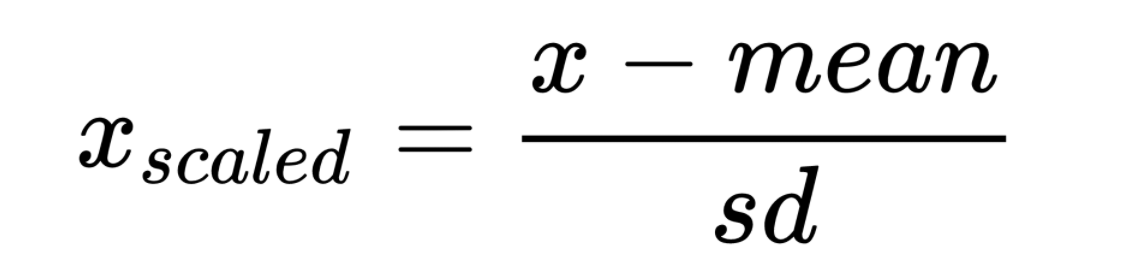 

## StandardScaler

StandardScaler는 앞에서 설명한 표준화를 쉽게 지원하기 위한 클래스이다. 즉, 개별 피쳐를 평균이 0이고, 분산이 1인 값으로 변환해준다. 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것은 몇몇 알고리즘에서 매우 중요하다. 특히 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(Support Vector Machine)이나 선형회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다. 

In [24]:
# Z score를 통한 표준화(Standardization)
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 df로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_df

print('feature 들의 평균값')
print(iris_df.mean())
print('\nfeature 들의 분산값')
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


이제 StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환하겠다. StandardScaler 객체를 생성한 후에 fit()과 transform()메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 간단하게 변환된다. transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 이를 DataFrame으로 변환해 평균값과 분산 값을 다시 확인해보자. 

In [31]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터셋 변환, fit()과 transform()을 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# 호출된 ndarray를 df로 바꿔서 변환해봅시다
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)

print('feature 들의 평균값')
print(iris_scaled_df.mean())
print('\nfeature 들의 분산값')
print(iris_scaled_df.var())


feature 들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## MinMaxScaler

다음으로 MinMaxScaler에 대해 알아보자. MinMaxScaler는 데이터 값을 0과 1사이의 범위 값으로 변환한다.(음수 값이 있으면 -1에서 1값으로 변환한다.) 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있다. 다음 예제를 통해 MinMaxScaler가 어떻게 동작하는지 확인해보자.

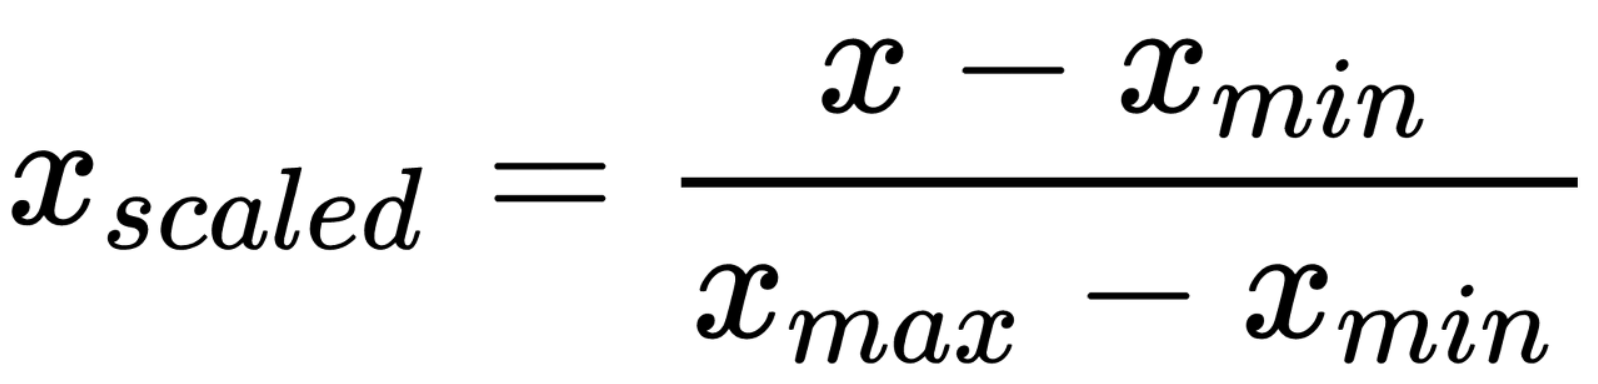 

일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념입니다. 예를 들어 피처 A는 거리를 나타내는 변수로서 값이 0 ~ 100KM로 주어지고 피처 B는 금액을 나타내는 속성으로 값이 0 ~ 100,000,000,000원으로 주어진다면 이 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1의 값으로 변환하는 것이다. 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것이다. 

새로운 데이터 xi_new는 원래 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최댓값과 최솟값의 차이로 나눈 값으로 변환할 수 있다.

In [33]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# StandardScaler로 데이터셋 변환, fit()과 transform()을 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# 호출된 ndarray를 df로 바꿔서 변환해봅시다
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)

print('feature 들의 최소값')
print(iris_scaled_df.min())
print('\nfeature 들의 최대값')
print(iris_scaled_df.max())

feature 들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있다.

파이썬 기반에서 머신러닝을 수행하기 위한 다양한 요소를 살펴보았다. 데이터 분석가나 데이터 과학자로서의 역량을 증대하기 위해서는 머신러닝 알고리즘이나 이들 API에 대한 사용법 못지않게 데이터 분석에 대한 감을 강화하는 것이 중요하다. 이러한 데이터 능력을 향상시키는 가장 좋은 방법은 많은 데이터 분석 작업을 스스로 수행해 보는 것이다. 벽에 부딪힐 때마다 포기하지 않고 다양한 방법을 실전에 적용해 가면서 자신만의 데이터 분석에 대한 감을 쌓아 나가면 그 길에 도달할 수 있다. 다음으로 머신러닝 알고리즘을 이용해 캐글(kaggle)의 타이타닉 데이터 세트에서 생존자를 예측하는 예제를 작성해보자. 